<a href="https://colab.research.google.com/github/harikrish2727/sentiment_analysis_bag_of_words_model/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lema = WordNetLemmatizer()
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,precision_score,recall_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Import Dataset**

In [2]:
data = pd.read_csv("Restaurant_Reviews.tsv",sep="\t")

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Data Preparation**

In [4]:
corpus = []
for i in range(0,1000):
   review = re.sub("[^a-zA-Z]", " ",data["Review"][i])   #removing everything otherthan alphabets
   review = review.lower()                               #lowercasing
   review = word_tokenize(review)                        #word tokenising, can also use split() method,
   stop_words = stopwords.words("english")               #stopwords in english
   stop_words.remove("not")                              #not is not a stop word so removing it from stopwords
   review = [lema.lemmatize(word) for word in review if word not in stop_words]     #using lematizer to make the words to root form,can also use stemming
   review = " ".join(review)                             
   corpus.append(review)



In [5]:
corpus[:20]

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like']

In [6]:
countvect = CountVectorizer()

In [7]:
tidf = TfidfVectorizer()

In [8]:
X = countvect.fit_transform(corpus).toarray()        #toarray convert letters to array form

In [9]:
y = data["Liked"].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [11]:
def algo(model,xtrain,ytrain,xtest,ytest):
  model.fit(xtrain,ytrain)
  pred = model.predict(xtest)
  acc = accuracy_score(ytest,pred)
  return pred,acc

In [12]:
classifier = GaussianNB()

In [13]:
y_pred,accuracy = algo(classifier,X_train,y_train,X_test,y_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[ 70,  58],
       [ 17, 105]])

In [15]:
accuracy_score(y_test,y_pred)

0.7

In [16]:
precision_score(y_test,y_pred)

0.6441717791411042

In [17]:
recall_score(y_test,y_pred)

0.860655737704918

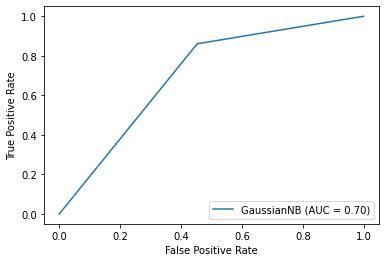

In [18]:
plot_roc_curve(classifier,X_test,y_test)

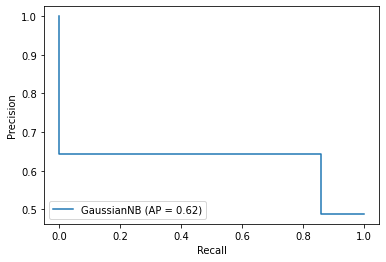

In [19]:
plot_precision_recall_curve(classifier,X_test,y_test)

In [20]:
s = y_pred.reshape(len(y_pred),1)

In [21]:
y = y_test.reshape(len(y_test),1)

In [22]:
np.concatenate((y,s),axis=1)

array([[1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1,

**Using TFIDf**

In [23]:
X_tf = tidf.fit_transform(corpus).toarray()

In [24]:
y = data["Liked"].values

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_tf,y,random_state=23,test_size=0.2)

In [26]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[59, 40],
       [24, 77]])

In [29]:
accuracy_score(y_test,y_pred)

0.68

**since this is a small dataset, accuracy is negotiated**